
#                                         Exploratory Data Analysis


# Basic exploration of Iris dataset

### Objectives of EDA
- To understand and exploring high level statistics of the dataset:number of points, numer of features, number of classes, data-   points per class,missing rows,outliers.
- To perform Univaraite analysis(PDF, CDF) to understand which features are useful towards classification.
- To perform Bi-variate analysis (scatter plots, pair-plots,contour plots) to see if combinations of features are useful in       classfication.

In [1]:
## Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load iris.csv into pandas dataframe

iris = pd.read_csv("iris.csv")

In [3]:
# Printing top 5 rows
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
# No. of datapoints & features - basically dimensions
print(iris.shape)

(150, 5)


In [5]:
# To get column names from the dataset
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [7]:
# How many points are present in each class?
iris["species"].value_counts()

#Iris is a balanced dataset as the number of data points for every class is 50.

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [217]:
# Missing rows 
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## 2-D Scatter Plot


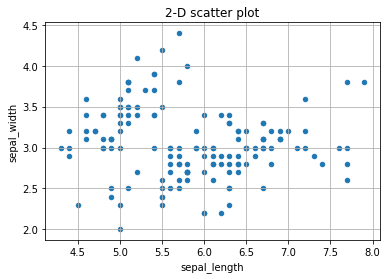

In [15]:
# 2-D plot
iris.plot(kind = 'scatter',x = 'sepal_length',y = 'sepal_width',title = '2-D scatter plot');
plt.grid()
plt.show()

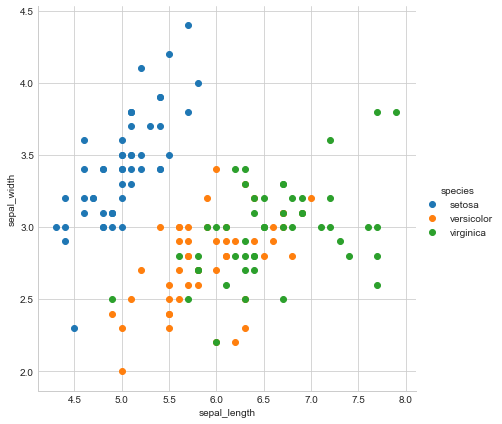

In [27]:
# 2-D plot with color. 
# We have used sepal_length & sepal_width as x & y axiz respectively.
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue = "species", size = 6) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend();
plt.show()

# Notice that the blue points can be easily seperated from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.

##### Observations:
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

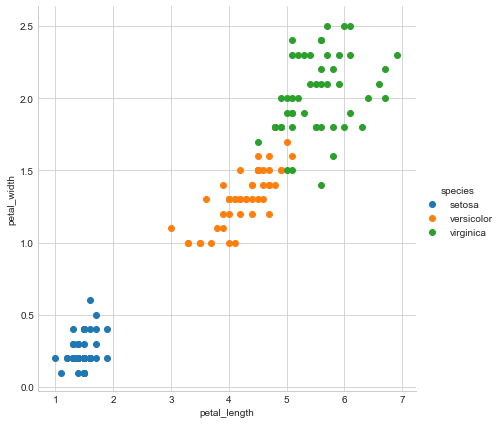

In [28]:
# # 2-D plot with color. 
# We have used petal_length & petal_width as x & y axis respectively.
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue = "species", size = 6) \
    .map(plt.scatter, "petal_length", "petal_width") \
    .add_legend();
plt.show()

## 3-D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/#3d-scatter-plot







## Pair plots

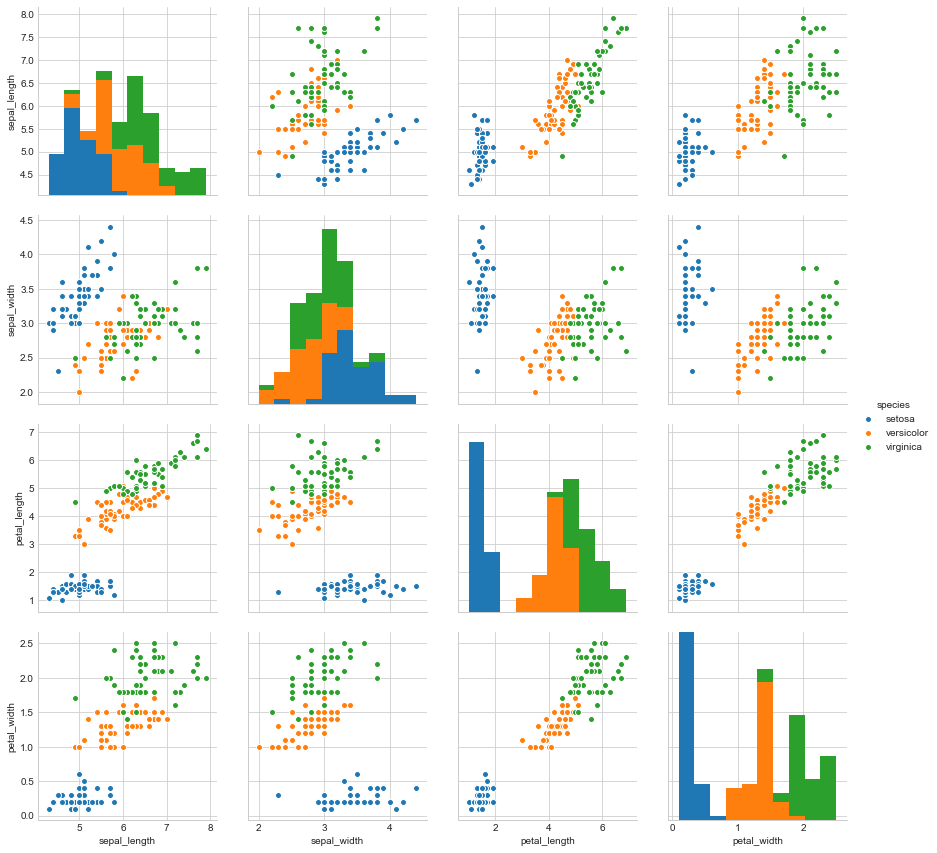

In [32]:
# Pair plots. We have 6 combinations of plots

plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue = "species",size = 3);
plt.show()

# NOTE: the diagnol elements are PDFs for each feature. PDFs are explained below.

##### Observations:
- Petal_length and petal_width are the most useful features to identify various flower types.
- While Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).
- We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.


## Histogram, PDF & CDF 

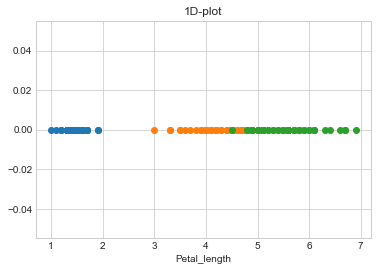

In [95]:
# 1-D scatter plot
import numpy as np
iris_setosa = iris.loc[iris["species"] == 'setosa']
iris_virginica = iris.loc[iris["species"] == 'virginica']
iris_versicolor = iris.loc[iris["species"] == 'versicolor']

#print(iris_setosa)
#print(iris_versicolor)
#print(iris_virginica)

# print 1-D plot
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa["petal_length"]),'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor["petal_length"]),'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica["petal_length"]),'o')

plt.xlabel("Petal_length")
#plt.ylabel("Scale")
plt.title("1D-plot")
plt.show()

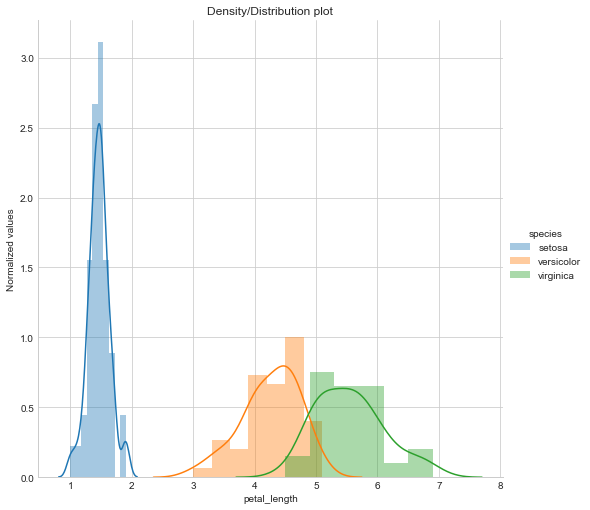

In [63]:
# Distribution plot

sns.FacetGrid(iris, hue="species", size=7) \
   .map(sns.distplot, "petal_length") \
   .add_legend();

plt.ylabel("Normalized values")
plt.title("Density/Distribution plot")
plt.show();

# Histogram gives us the count/frequency of values per interval.
# PDF is a smoothed form of histogram
# Looking at the histogram of petal_length we could distinguish 3 species of flowers using simple if-else conditions. 
# We set thresholds to distinguish the species.

# Density plot - When we have a particular region or interval filled with datapoints, then that region 
# looks dense or concentrated. Also the peakedness of the curve increases because of the concentration of points.

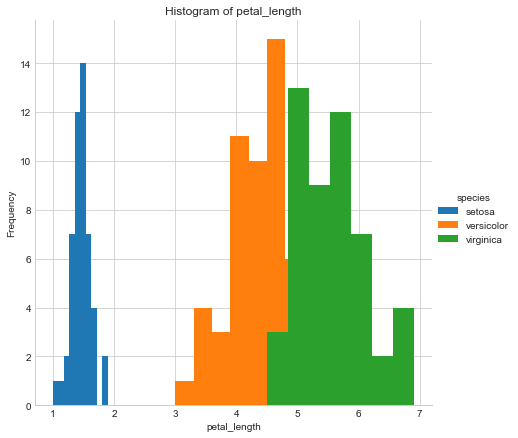

In [60]:
# Histogram 

sns.set_style("whitegrid")
sns.FacetGrid(iris, hue = "species", size = 6) \
    .map(plt.hist, "petal_length",bins = 'auto') \
    .add_legend();
plt.title("Histogram of petal_length")
plt.ylabel("Frequency")
plt.xlabel("petal_length")
plt.show()




## Univariate analysis using PDF

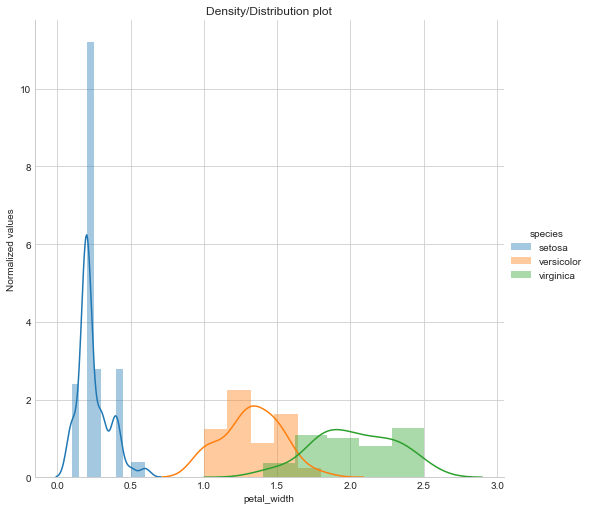

In [222]:
# Distribution plot

sns.FacetGrid(iris, hue="species", size=7) \
   .map(sns.distplot, "petal_width") \
   .add_legend();

plt.ylabel("Normalized values")
plt.title("Density/Distribution plot")
plt.show();

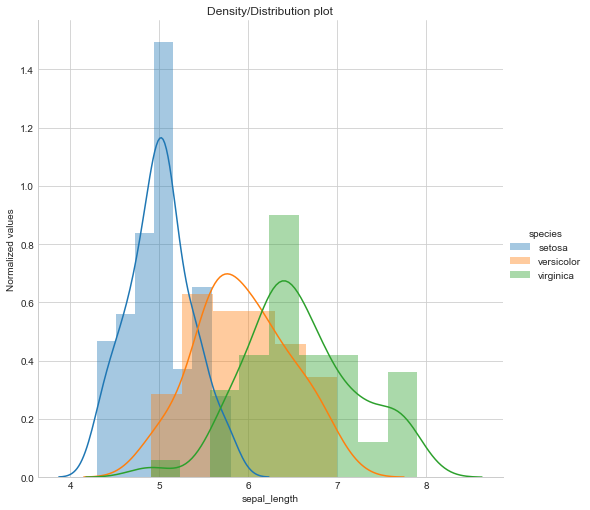

In [221]:
# Distribution plot

sns.FacetGrid(iris, hue="species", size=7) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();

plt.ylabel("Normalized values")
plt.title("Density/Distribution plot")
plt.show();

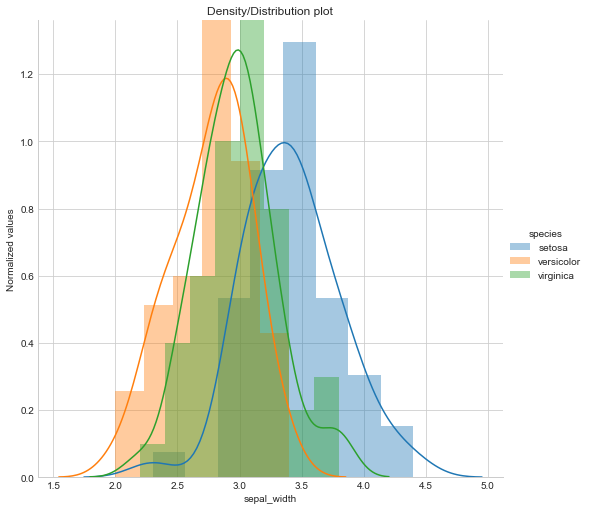

In [220]:
# Distribution plot

sns.FacetGrid(iris, hue="species", size=7) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();

plt.ylabel("Normalized values")
plt.title("Density/Distribution plot")
plt.show();

##### Observations:
- We have created PDF's for all 4 variables. We need to understand which vairable is more useful in classifying the species.
- The farther the distributions are, better it is for classifying the species.
- Looking at the plots, between petal_length & petal_width there is not much difference except tails are wider in petal_width.
  Both have few points overlapping which is fine. So we can pick petal_length over petal_width as a better separator of species.
- Sepal_length & sepal_width have many overlaps and they are not doing a good job of classifying points.




### PDF & CDF 

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


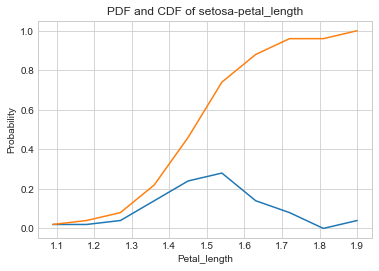

In [89]:
# CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# Look what happens if the bin-width is changed from 10 to 20. 
# counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                # density = True)
# pdf = counts/(sum(counts))
# plt.plot(bin_edges[1:],pdf);

plt.xlabel("Petal_length")
plt.ylabel("Probability")
plt.title("PDF and CDF of setosa-petal_length")
plt.show();

##### Observations:
- PDF tells us the probability of points lying in a range or an interval
- So we can say that between 1.5 to 1.6 interval we have roughly 23% of points

- CDF is the cumulative sum of PDF
- Here,let's say we take a value of 1.6. Then from CDF we can say that about 82% of setosa flowers have petal_length of less than 1.6 units.
- Always CDF ranges from 0 to 1. 

[0.04 0.04 0.14 0.24 0.28 0.14 0.08 0.04]
[1.     1.1125 1.225  1.3375 1.45   1.5625 1.675  1.7875 1.9   ]
[0.04 0.08 0.22 0.46 0.74 0.88 0.96 1.  ]
[0.02 0.08 0.04 0.18 0.18 0.22 0.2  0.08]
[3.     3.2625 3.525  3.7875 4.05   4.3125 4.575  4.8375 5.1   ]
[0.02 0.1  0.14 0.32 0.5  0.72 0.92 1.  ]
[0.02 0.16 0.22 0.22 0.16 0.12 0.04 0.06]
[4.5 4.8 5.1 5.4 5.7 6.  6.3 6.6 6.9]
[0.02 0.18 0.4  0.62 0.78 0.9  0.94 1.  ]


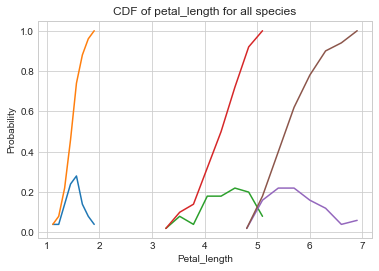

In [94]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

# Setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=8, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=8, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=8, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Petal_length")
plt.ylabel("Probability")
plt.title("CDF of petal_length for all species")
plt.show();

##### Observations:
- Considering the iris dataset, we can say that all petal_length less than 2 belong to setosa. We are 100% sure that all flowers  below length of 2 are setosa.

- At value equal 5, we have our versicolor & virginica pdf's intersecting (overlap of points). 
- The corresponding cdf value of 5 is 0.96(approx). Also the value of cdf where both pdf's intersect is 0.1 (approx)
- Now values greater than 2 and lesser than equal to 5 can be classified as versicolor with 95% accuracy
- And values greater than 2 and greater than 5 can be classified as virginica with 90% accuracy.




## Mean,Variance and Standard Deviation

In [208]:
# Mean of setosa,versicolor & virginica

print("\nMeans:")
# setosa
print(np.mean(iris_setosa["petal_length"]))

# Mean with an outlier - Here we append 500, to setosa dataset to calculate the mean.
print(round(np.mean(np.append(iris_setosa["petal_length"],500)),2))

# versicolor
print(np.mean(iris_versicolor["petal_length"]))

# virginica
print(np.mean(iris_virginica["petal_length"]))


Means:
1.464
11.24
4.26
5.552


In [164]:
# Standard deviation of setosa,versicolor & virginica

print("\nStd-dev:")
# setosa
print(round(np.std(iris_setosa["petal_length"]),2))

# versicolor
print(round(np.std(iris_versicolor["petal_length"]),2))

# virginica
print(round(np.std(iris_virginica["petal_length"]),2))

# Std of setosa with an outlier - Here we append 500, to setosa dataset to calculate the std.
print(round(np.std(np.append(iris_setosa["petal_length"],500)),2))

Std-dev:
0.17
0.47
0.55
69.12




# Median, Percentile, Quantile, IQR & MAD


In [209]:
# Median 

print("\nMedians:")
# setosa
print(np.median(iris_setosa["petal_length"]))

# Mean with an outlier - Here we append 500, to setosa dataset to calculate the median.
print(round(np.median(np.append(iris_setosa["petal_length"],500)),2))

# versicolor
print(np.median(iris_versicolor["petal_length"]))

# virginica
print(np.median(iris_virginica["petal_length"]))
#====================================================================================================#

# Percentiles & Quantiles

# Percentiles
print("\n90th Percentiles:")

# setosa
print(np.percentile(iris_setosa["petal_length"],90))

# virginica
print(round(np.percentile(iris_virginica["petal_length"],90),2))

# versicolor
print(np.percentile(iris_versicolor["petal_length"], 90))
#======================================================================================================#

# Quantiles
print("\nQuantiles:")

# setosa
print(np.percentile(iris_setosa["petal_length"],np.arange(0,100,25)))

# virginica
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))

# versicolor
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

# np.arange - This method returns an array with evenly spaced elements as per the interval secified.
#=====================================================================================================#


# MAD from astropy.stats import median_absolute_deviation

print("\nMAD from astropy.stats:")
# setosa
print(round(median_absolute_deviation(iris_setosa["petal_length"]),2))

# virginica
print(round(median_absolute_deviation(iris_virginica["petal_length"]),2))

#versicolor
print(round(median_absolute_deviation(iris_versicolor["petal_length"]),2))


Medians:
1.5
1.5
4.35
5.55

90th Percentiles:
1.7
6.31
4.8

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

MAD from astropy.stats:
0.1
0.45
0.35




##  Box-plots

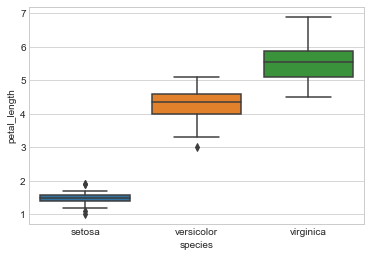

In [212]:
# Box-plots using petal_length

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

#####  Observations:
- 50th percentile - median of setosa is 1.5
- 50th percentile - median of versicolor is 4.35
- 50th percentile - median of virginica is 5.55
 



## Violin plots

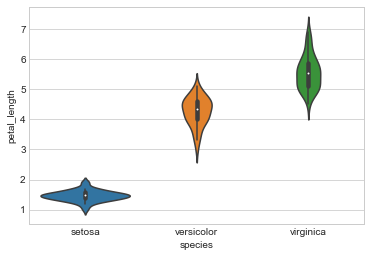

In [214]:
# Violin plot combines the benefits of both histogram and box-plot
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

sns.violinplot(data = iris,x = "species",y = "petal_length", size = 10)
plt.show()

# The thick candle like structures act like box-plots and the thin line is a whisker.
# If we rotate the plot we can think of it as a bell curve.

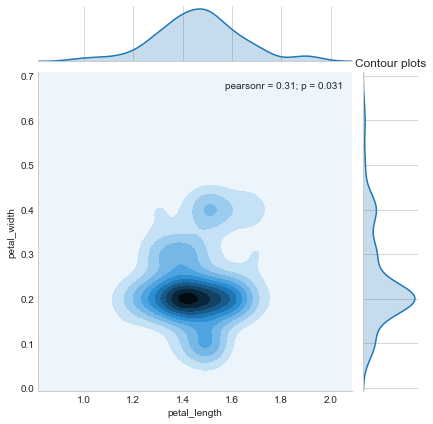

In [219]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.title("Contour plots")
plt.show();

##### Obeservations:
- They are called contour plots because they look similar to a topographic map. 
- The plot should be understood as if it's heading towards us.
- We have lot of points concentrated on the inner most region and its distinguished by the dense color. 
- Also if we observe no two contour lines intersect with each other. 
- The probability/height of points lying on each contour are same.
- The outermost region has lower concentration of datapoints, hence they are pale in color.
